In [1]:
# Manipulação e visualização de dados
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# Pré-processamento de dados 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer


# Classificadores 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.linear_model import RidgeClassifier

# Métricas de desempenho 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# import shap

# Controle de warnings 
import warnings
warnings.filterwarnings('ignore')

##### Pré-processamento
- 1 - Divisão da base entre treino e teste (80/20)
- 2 - Codificiar a Education por meio de OHE (One Hot Encoder)
- 3 - Robust Scaler foi escolhido, por não ser afetado por outliers como Sandard Scaler e MinMaxScaler

In [3]:
df = pd.read_parquet("../data/dados_banco.parquet")

In [5]:
def map_education(X):
    X = X.copy()
    X['Education'] = X['Education'].replace({
        1: 'Graduacao',
        2: 'Mestrado',
        3: 'Nível Avançado'
    })
    return X

In [6]:
# 2 - Codificar a variável Education
education_transformer = FunctionTransformer(map_education, validate=False)
df = education_transformer.fit_transform(df)

In [7]:
X = df.drop(columns = ['ID', 'ZIP.Code', 'Personal.Loan'], axis = 1)
y = df['Personal.Loan']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=42)

In [9]:
print(f'X_train - Proporção da classe 0: {y_train.value_counts(normalize=True)[0]}')
print(f'y_train - Proporção da classe 1: {y_train.value_counts(normalize=True)[1]}')
print(f'X_test - Proporção da classe 0: {y_train.value_counts(normalize=True)[0]}')
print(f'y_test - Proporção da classe 1: {y_train.value_counts(normalize=True)[1]}')

X_train - Proporção da classe 0: 0.904
y_train - Proporção da classe 1: 0.096
X_test - Proporção da classe 0: 0.904
y_test - Proporção da classe 1: 0.096


In [10]:
numerical_features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
categorical_features = ['Education']

In [11]:
numerical_transformer = Pipeline(steps = [('scaler', RobustScaler())])
categorical_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

In [12]:
preprocessor = ColumnTransformer(transformers = [
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

In [13]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

##### Treino - Com a base geral

🔍 LogisticRegression 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       904
           1       0.83      0.70      0.76        96

    accuracy                           0.96      1000
   macro avg       0.90      0.84      0.87      1000
weighted avg       0.95      0.96      0.96      1000

ROC AUC score: 0.9550


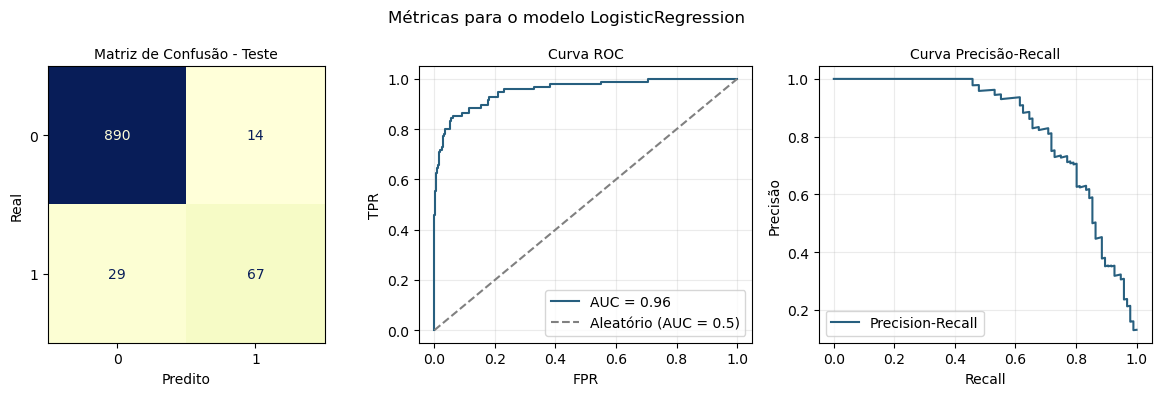

🔍 DecisionTree 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       904
           1       0.91      0.96      0.93        96

    accuracy                           0.99      1000
   macro avg       0.95      0.97      0.96      1000
weighted avg       0.99      0.99      0.99      1000

ROC AUC score: 0.9742


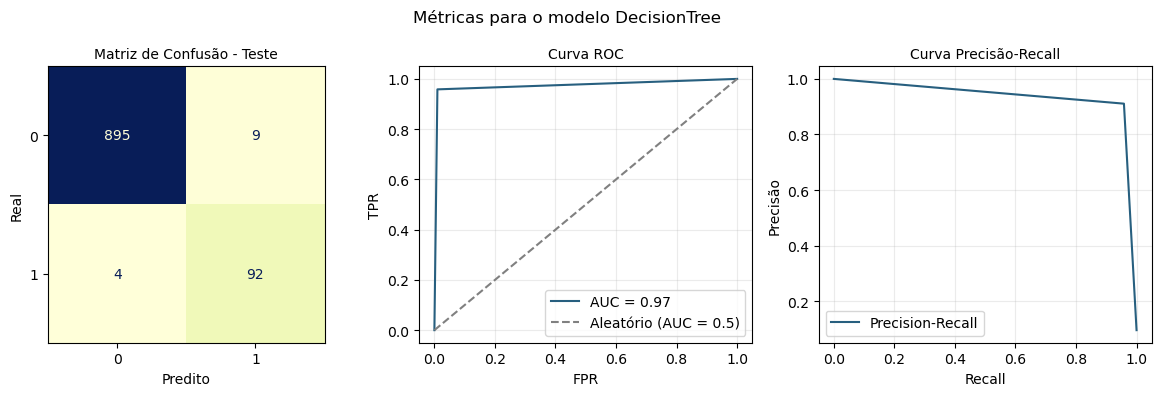

🔍 KNN 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       904
           1       0.97      0.69      0.80        96

    accuracy                           0.97      1000
   macro avg       0.97      0.84      0.89      1000
weighted avg       0.97      0.97      0.97      1000

ROC AUC score: 0.9479


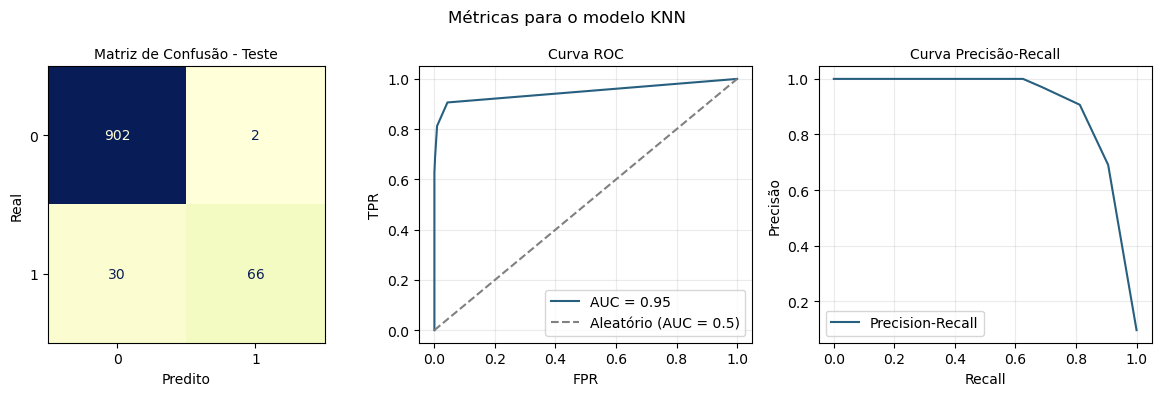

🔍 AdaBoost 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       904
           1       0.84      0.83      0.84        96

    accuracy                           0.97      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.97      0.97      0.97      1000

ROC AUC score: 0.9848


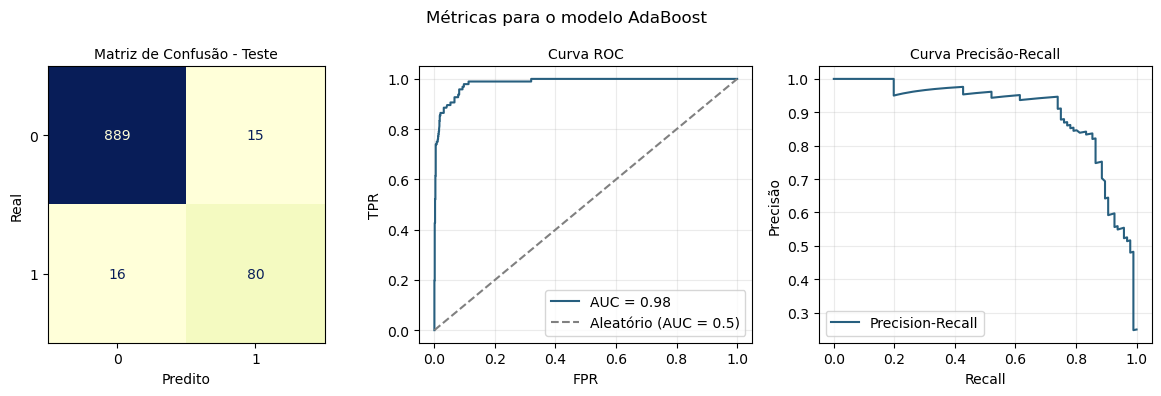

🔍 RandomForest 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       904
           1       0.96      0.96      0.96        96

    accuracy                           0.99      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000

ROC AUC score: 0.9985


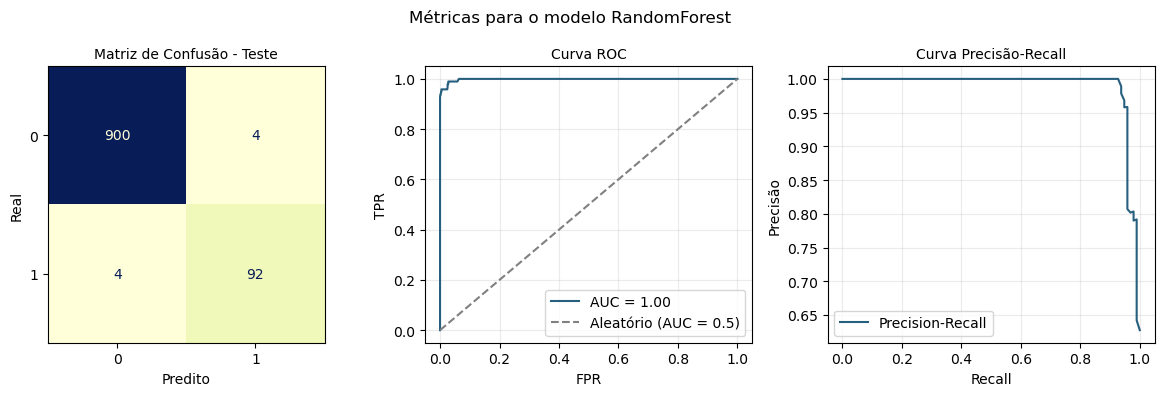

🔍 XGBoost 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       904
           1       0.95      0.94      0.94        96

    accuracy                           0.99      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.99      0.99      0.99      1000

ROC AUC score: 0.9989


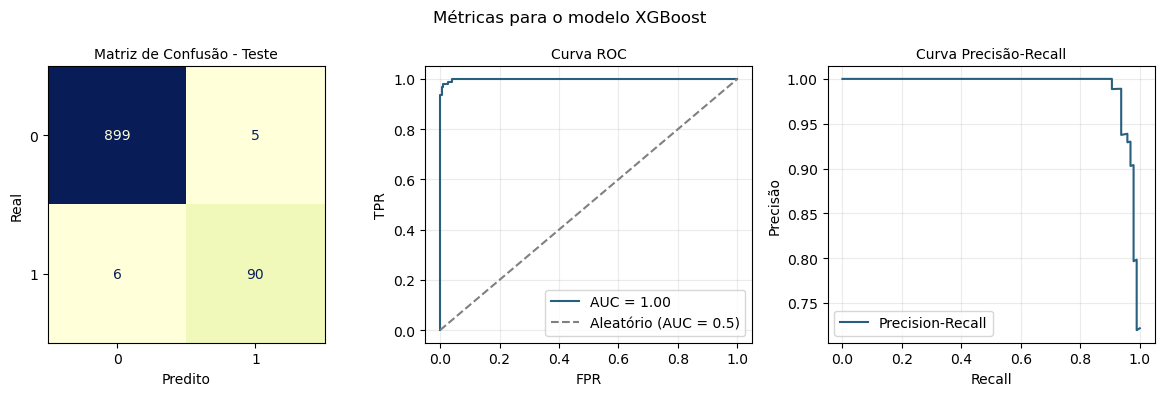

🔍 SVC 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       904
           1       0.96      0.79      0.87        96

    accuracy                           0.98      1000
   macro avg       0.97      0.89      0.93      1000
weighted avg       0.98      0.98      0.98      1000

ROC AUC score: 0.9933


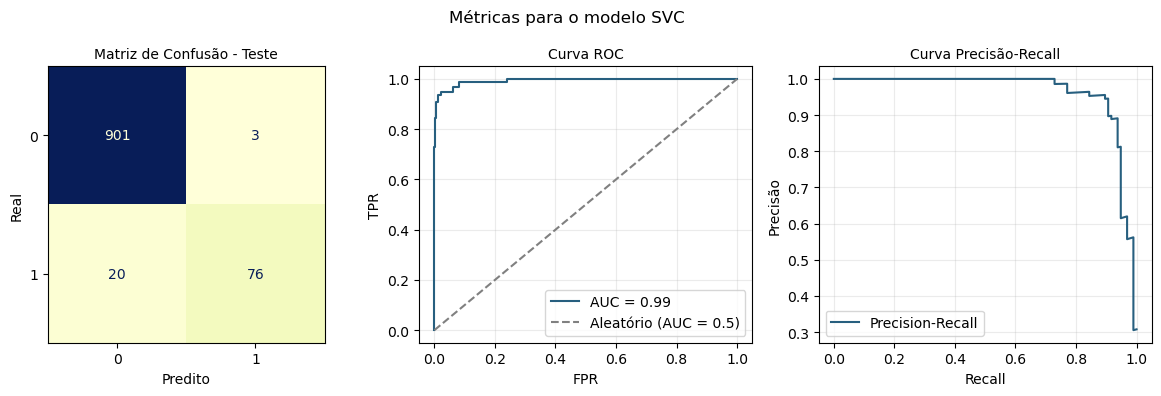

🔍 NaiveBayes 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       904
           1       0.53      0.64      0.58        96

    accuracy                           0.91      1000
   macro avg       0.74      0.79      0.76      1000
weighted avg       0.92      0.91      0.91      1000

ROC AUC score: 0.9401


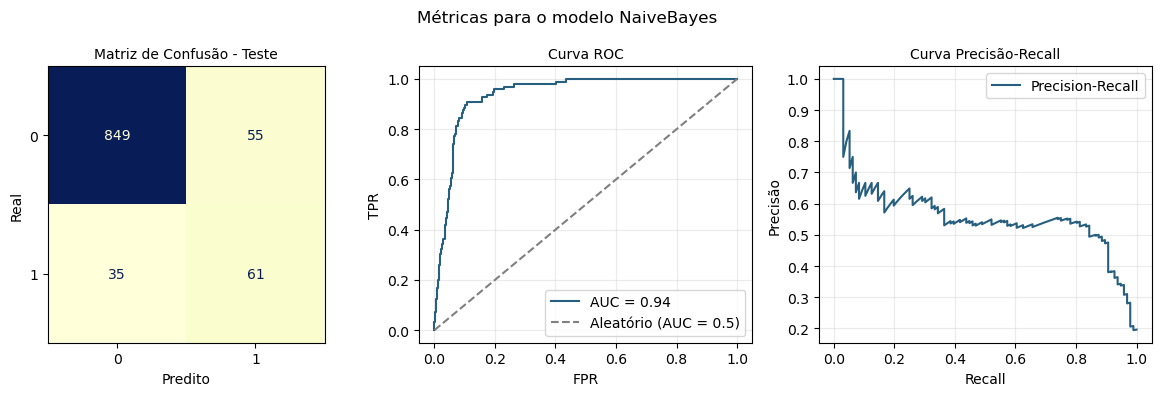

🔍 RidgeClassifier 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       904
           1       0.93      0.29      0.44        96

    accuracy                           0.93      1000
   macro avg       0.93      0.64      0.70      1000
weighted avg       0.93      0.93      0.91      1000

ROC AUC score: 0.9624


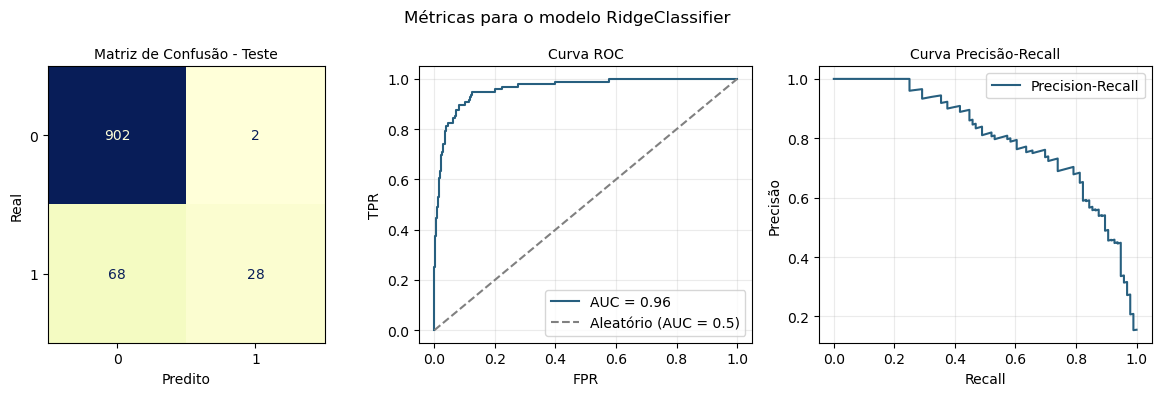

In [16]:
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    
    'SVC': SVC(probability=True, random_state=42),
    'NaiveBayes': GaussianNB(),
    'RidgeClassifier': RidgeClassifier(random_state=42)
}

paleta = sns.color_palette('YlGnBu_d')


# Loop para treinar e avaliar todos os modelos
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('classifier', model)])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Alguns modelos não possuem predict_proba (como RidgeClassifier)
    if hasattr(pipeline.named_steps['classifier'], "predict_proba"):
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    else:
        # Alternativa para gerar "probabilidades" via decision_function normalizada
        scores = pipeline.decision_function(X_test)
        y_pred_proba = (scores - scores.min()) / (scores.max() - scores.min())

    print(f'🔍 {model_name} \n{classification_report(y_test, y_pred)}')
    print(f'ROC AUC score: {roc_auc_score(y_test, y_pred_proba):.4f}')

    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    plt.suptitle(f'Métricas para o modelo {model_name}')

    # Matriz de Confusão
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='YlGnBu', colorbar=False, ax=ax[0])
    ax[0].set_title('Matriz de Confusão - Teste', fontsize=10)
    ax[0].set_xlabel('Predito')
    ax[0].set_ylabel('Real')

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    ax[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color=paleta[4])
    ax[1].plot([0, 1], [0, 1], 'k--', label='Aleatório (AUC = 0.5)', color='gray')
    ax[1].set_title('Curva ROC', fontsize=10)
    ax[1].set_xlabel('FPR')
    ax[1].set_ylabel('TPR')
    ax[1].legend(loc='lower right')
    ax[1].grid(alpha=0.25)

    # Curva Precisão-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    ax[2].plot(recall, precision, label='Precision-Recall', color=paleta[4])
    ax[2].set_title('Curva Precisão-Recall', fontsize=10)
    ax[2].set_xlabel('Recall')
    ax[2].set_ylabel('Precisão')
    ax[2].legend(loc='best')
    ax[2].grid(alpha=0.25)

    plt.tight_layout()
    plt.show()

In [17]:
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'NaiveBayes': GaussianNB(),
    'RidgeClassifier': RidgeClassifier(random_state=42)
}

resumo_metricas = []

for model_name, model in models.items():
    pipeline = Pipeline(steps=[('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    if hasattr(pipeline.named_steps['classifier'], "predict_proba"):
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    elif hasattr(pipeline.named_steps['classifier'], "decision_function"):
        scores = pipeline.decision_function(X_test)
        y_pred_proba = (scores - scores.min()) / (scores.max() - scores.min())
    else:
        y_pred_proba = None
    
    resumo_metricas.append({
        'Modelo': model_name,
        'Acurácia': accuracy_score(y_test, y_pred),
        'Precisão': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score (macro avg)': f1_score(y_test, y_pred, average="macro"),
        'F1-score (weighted)': f1_score(y_test, y_pred, average="weighted"),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'
    })

df_metricas = pd.DataFrame(resumo_metricas)
df_metricas = df_metricas.sort_values(by='F1-score (macro avg)', ascending=False).reset_index(drop=True)

df_metricas

,Modelo,Acurácia,Precisão,Recall,F1-score (macro avg),F1-score (weighted),ROC AUC
0,RandomForest,0.992,0.958333,0.958333,0.976954,0.992000,0.998473
1,XGBoost,0.989,0.947368,0.937500,0.968164,0.988974,0.998928
2,DecisionTree,0.987,0.910891,0.958333,0.963400,0.987147,0.974189
3,SVC,0.977,0.962025,0.791667,0.927984,0.975990,0.993305
4,AdaBoost,0.969,0.842105,0.833333,0.910280,0.968927,0.984796
5,KNN,0.968,0.970588,0.687500,0.893724,0.965512,0.947905
6,LogisticRegression,0.957,0.827160,0.697917,0.866737,0.955355,0.955015
7,NaiveBayes,0.910,0.525862,0.635417,0.762568,0.913742,0.940139
8,RidgeClassifier,0.930,0.933333,0.291667,0.703546,0.912899,0.962401


### Resumo dos Modelos Avaliados

- **RandomForest e XGBoost** foram os melhores modelos:
  - Alta acurácia (~0.99) e ROC AUC (~0.998).
  - Excelente equilíbrio entre precisão e recall.

- **DecisionTree e SVC** também tiveram ótimo desempenho:
  - DecisionTree com alto recall.
  - SVC com excelente precisão e separação de classes (ROC AUC > 0.99).

- **AdaBoost e KNN** tiveram desempenho mediano:
  - AdaBoost foi equilibrado.
  - KNN teve alta precisão, mas recall mais baixo.

- **Modelos com desempenho mais fraco**:
  - **LogisticRegression**: bom baseline, mas recall limitado.
  - **NaiveBayes**: baixa precisão.
  - **RidgeClassifier**: muito baixo recall, mesmo com boa precisão.